In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy.random import randn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the required Dataframes
blocked_members = pd.read_csv('blocked_members.csv') # 19281 blocked members (at least one block/ban)
active_harassers = pd.read_csv('active_harassers.csv') # 1026 harassers (harassers who are active for more than 200 days)
active_normal_members = pd.read_csv('active_normal_members.csv') # 13738 active members (Members who have > 21 conver.)
frequent_harassers = pd.read_csv('frequent_harassers.csv') # 315 harassers (Harassers who are blocked > 10 times)
first = pd.read_csv('first.csv')
first1 = pd.read_csv('first1.csv')
allList = pd.read_csv("alllist.csv")
beforeblock1 = pd.read_csv('beforeblockactivehar.csv')
afterblock1 = pd.read_csv('afterblockactivehar.csv')
before = beforeblock1['Freq']
after = afterblock1['Freq']
beforeblock2 = pd.read_csv('beforeblockfreqhar.csv')
afterblock2 = pd.read_csv('afterblockfreqhar.csv')
before1 = beforeblock2['Freq']
after1 = afterblock2['Freq']
All_Gender = pd.read_csv('Gender.csv')
gm_before_ah = pd.read_csv('gm_before_ah.csv')
gm_after_ah = pd.read_csv('gm_after_ah.csv')
gm_before_fh = pd.read_csv('gm_before_fh.csv')
gm_after_fh = pd.read_csv('gm_after_fh.csv')

[(0, 700)]

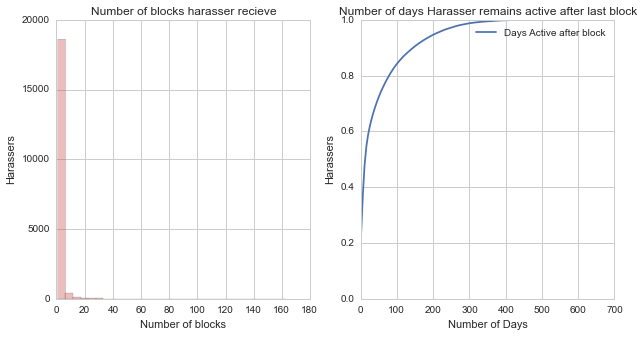

In [71]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
fig1 = sns.distplot(blocked_members['number_blocks'],bins=30,kde = False,hist_kws={'color':'indianred'},ax=axes[0])
fig1.set(xlabel='Number of blocks',ylabel='Harassers',title='Number of blocks harasser recieve')
fig1.set(xlim=(0,180))

#fig2 = sns.distplot(blocked_members['llu_minus_bt'],bins=30,kde = False,hist_kws={'color':'darkslateblue'},ax=axes[1])
#fig2.set(xlabel='Number of Days',ylabel='Harassers',title='Number of days Harasser remains active after last block')
#fig2.set(xlim=(0,600))

fig2 = sns.kdeplot(blocked_members['llu_minus_bt'],cumulative=True,label='Days Active after block',ax=axes[1])
fig2.set(xlabel='Number of Days',ylabel='Harassers',title='Number of days Harasser remains active after last block')
fig2.set(xlim=(0,700))

[(0, 80000)]

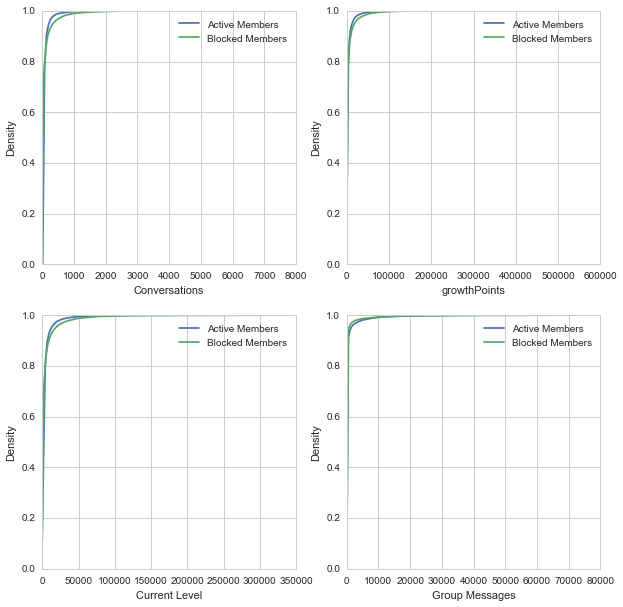

In [62]:
fig, axes = plt.subplots(2,2,figsize=(10, 10))

fig = sns.kdeplot(active_normal_members['numConversations'],cumulative=True,label='Active Members',ax=axes[0,0]) 
fig = sns.kdeplot(blocked_members['numConversations'],cumulative=True,label='Blocked Members',ax=axes[0,0])
fig.set(xlabel='Conversations', ylabel='Density')
fig.set(xlim=(0,8000))

fig1 = sns.kdeplot(active_normal_members['growthPoints'],cumulative=True,label='Active Members',ax=axes[0,1]) 
fig1 = sns.kdeplot(blocked_members['growthPoints'],cumulative=True,label='Blocked Members',ax=axes[0,1])
fig1.set(xlabel='growthPoints', ylabel='Density')
fig1.set(xlim=(0,600000))

fig2 = sns.kdeplot(active_normal_members['currentLevel'],cumulative=True,label='Active Members',ax=axes[1,0]) 
fig2 = sns.kdeplot(blocked_members['currentLevel'],cumulative=True,label='Blocked Members',ax=axes[1,0])
fig2.set(xlabel='Current Level', ylabel='Density')
fig2.set(xlim=(0,350000))

fig3 = sns.kdeplot(active_normal_members['groupSupportMsgs'],cumulative=True,label='Active Members',ax=axes[1,1]) 
fig3 = sns.kdeplot(blocked_members['groupSupportMsgs'],cumulative=True,label='Blocked Members',ax=axes[1,1])
fig3.set(xlabel='Group Messages', ylabel='Density')
fig3.set(xlim=(0,80000))

[(0, 12000)]

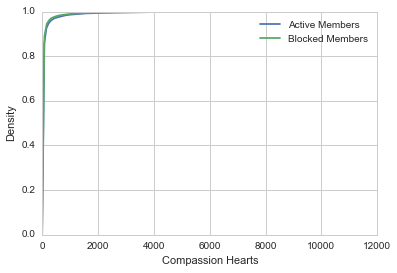

In [64]:
fig = sns.kdeplot(active_normal_members['compassionHearts'],cumulative=True,label='Active Members') 
fig = sns.kdeplot(blocked_members['compassionHearts'],cumulative=True,label='Blocked Members')
fig.set(xlabel='Compassion Hearts', ylabel='Density')
fig.set(xlim=(0,12000))

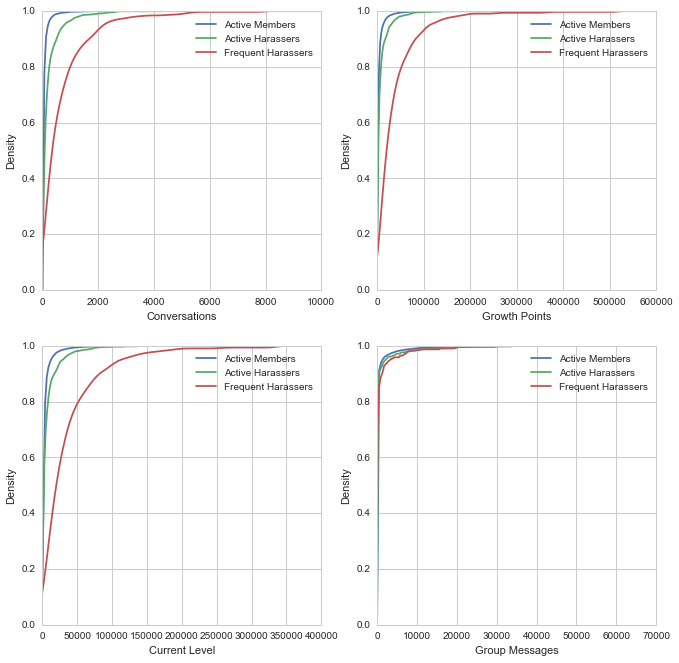

In [35]:
fig, axes = plt.subplots(2,2,figsize=(11, 11))
 
fig = sns.kdeplot(active_normal_members['numConversations'],cumulative=True,label='Active Members',ax=axes[0,0]) 
fig = sns.kdeplot(active_harassers['numConversations'],cumulative=True,label='Active Harassers',ax=axes[0,0])
fig = sns.kdeplot(frequent_harassers['numConversations'],cumulative=True,label='Frequent Harassers',ax=axes[0,0])
fig.set(xlabel='Conversations', ylabel='Density')
fig.set(xlim=(0,10000))

fig1 = sns.kdeplot(active_normal_members['growthPoints'],cumulative=True,label='Active Members',ax=axes[0,1])
fig1 = sns.kdeplot(active_harassers['growthPoints'],cumulative=True,label='Active Harassers',ax=axes[0,1])
fig1 = sns.kdeplot(frequent_harassers['growthPoints'],cumulative=True,label='Frequent Harassers',ax=axes[0,1])
fig1.set(xlabel='Growth Points',ylabel='Density')
fig1.set(xlim=(0,600000))

fig2 = sns.kdeplot(active_normal_members['currentLevel'],cumulative=True,label='Active Members',ax=axes[1,0])
fig2 = sns.kdeplot(active_harassers['currentLevel'],cumulative=True,label='Active Harassers',ax=axes[1,0])
fig2 = sns.kdeplot(frequent_harassers['currentLevel'],cumulative=True,label='Frequent Harassers',ax=axes[1,0])
fig2.set(xlabel='Current Level', ylabel='Density')
fig2.set(xlim=(0,400000))

fig3 = sns.kdeplot(active_normal_members['groupSupportMsgs'],cumulative=True,label='Active Members',ax=axes[1,1])
fig3 = sns.kdeplot(active_harassers['groupSupportMsgs'],cumulative=True,label='Active Harassers',ax=axes[1,1])
fig3 = sns.kdeplot(frequent_harassers['groupSupportMsgs'],cumulative=True,label='Frequent Harassers',ax=axes[1,1])
fig3.set(xlabel='Group Messages', ylabel='Density')
fig3.set(xlim=(0,70000))

#fig4 = sns.kdeplot(active_normal_members['compassionHearts'],cumulative=True,label='Active Members',ax=axes[2,0])
#fig4 = sns.kdeplot(active_harassers['compassionHearts'],cumulative=True,label='Active Harassers',ax=axes[2,0])
#fig4 = sns.kdeplot(frequent_harassers['compassionHearts'],cumulative=True,label='Frequent Harassers',ax=axes[2,0])
#fig4.set(xlabel='Compassion Hearts', ylabel='Density')
#fig4.set(xlim=(0,10000))
plt.savefig("Behavior.pdf",transparent=True)

[(0, 10000)]

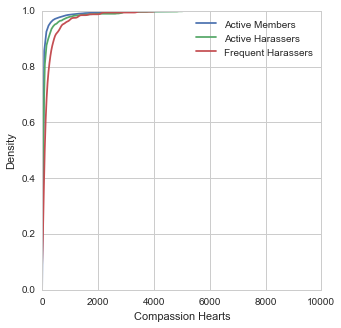

In [56]:
plt.figure(figsize=(5, 5))
fig = sns.kdeplot(active_normal_members['compassionHearts'],cumulative=True,label='Active Members')
fig = sns.kdeplot(active_harassers['compassionHearts'],cumulative=True,label='Active Harassers')
fig = sns.kdeplot(frequent_harassers['compassionHearts'],cumulative=True,label='Frequent Harassers')
fig.set(xlabel='Compassion Hearts', ylabel='Density')
fig.set(xlim=(0,10000))

[(200, 800)]

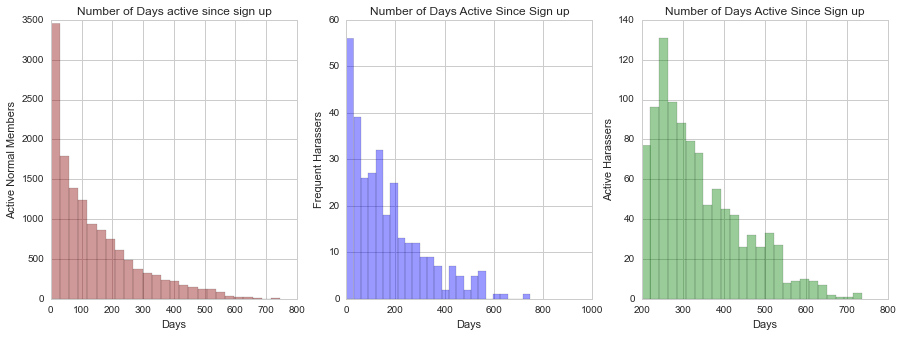

In [64]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig1 = sns.distplot(active_normal_members['llu_minus_sud'],bins=25,kde = False,hist_kws={'color':'darkred'},ax=axes[0])
fig1.set(xlabel='Days',ylabel='Active Normal Members',title='Number of Days active since sign up')
fig1.set(xlim=(0,800)) # Active Normal Members

fig = sns.distplot(frequent_harassers['llu_minus_sud'],bins=25,kde = False,hist_kws={'color':'blue'},ax=axes[1])
fig.set(xlabel="Days",ylabel="Frequent Harassers",title='Number of Days Active Since Sign up ')
fig.set(xlim=(0,1000)) # Frequent harassers

fig2 = sns.distplot(active_harassers['llu_minus_sud'],bins=25,kde = False,hist_kws={'color':'green'},ax=axes[2])
fig2.set(xlabel="Days",ylabel="Active Harassers",title='Number of Days Active Since Sign up ')
fig2.set(xlim=(200,800)) # Active harassers


[(0, 100)]

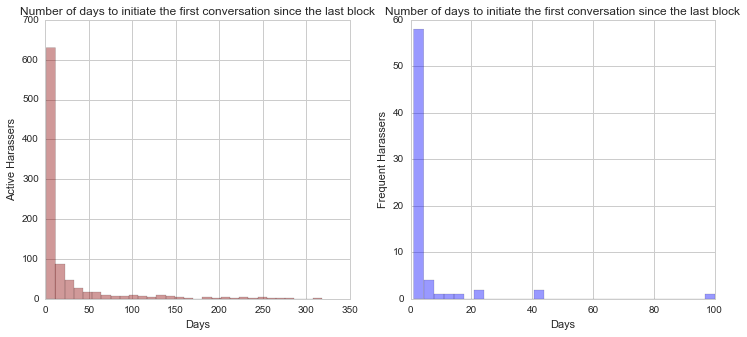

In [61]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

fig = sns.distplot(first['days'],bins=30,kde=False,hist_kws={'color':'darkred'},ax=axes[0])
fig.set(xlabel='Days',ylabel='Active Harassers',title='Number of days to initiate the first conversation since the last block')
fig.set(xlim=(0,350))

fig1 = sns.distplot(first1['days'],bins=30,kde=False,hist_kws={'color':'blue'},ax=axes[1])
fig1.set(xlabel='Days',ylabel='Frequent Harassers',title='Number of days to initiate the first conversation since the last block')
fig1.set(xlim=(0,100))


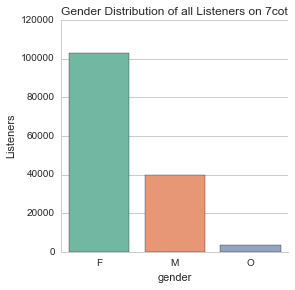

In [5]:
fig = sns.factorplot('gender',kind='count',data=All_Gender,palette='Set2')
fig = fig.set(ylabel='Listeners',title='Gender Distribution of all Listeners on 7cot')

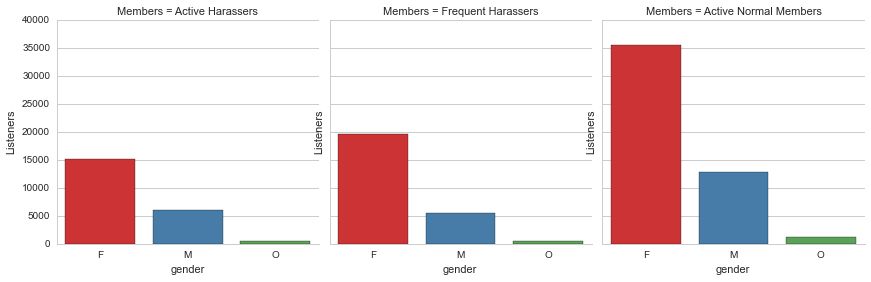

In [4]:
fig = sns.factorplot('gender',col='Members',kind='count',data=allList,palette='Set1')
fig = fig.set(ylabel="Listeners")         

[<matplotlib.text.Text at 0x10dc612b0>, <matplotlib.text.Text at 0x10dc428d0>]

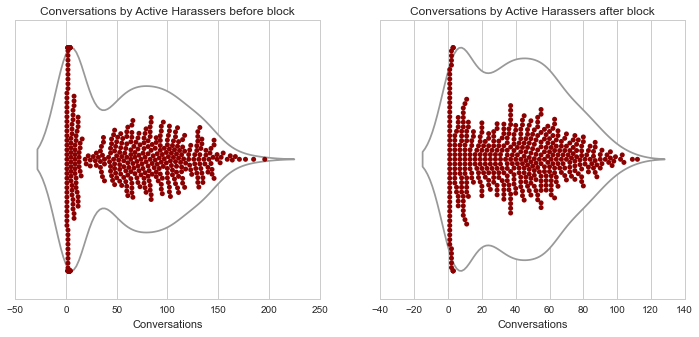

In [17]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

fig = sns.violinplot(before,inner=None,color='white',ax=axes[0])
fig = sns.swarmplot(before,color='darkred',edgecolor='black',ax=axes[0])
fig.set(xlabel='Conversations',title='Conversations by Active Harassers before block')

fig1 = sns.violinplot(after,inner=None,color='white',ax=axes[1])
fig1 = sns.swarmplot(after,color='darkred',edgecolor='black',ax=axes[1])
fig1.set(xlabel='Conversations',title='Conversations by Active Harassers after block')


The average conversations before block were 59.60 with standard deviation 49.25 for Active Harassers.

The average conversations after block were 38.87 with standard deviation 27.48 for Active Harassers.

[<matplotlib.text.Text at 0x10e8ec048>, <matplotlib.text.Text at 0x10e8dd048>]

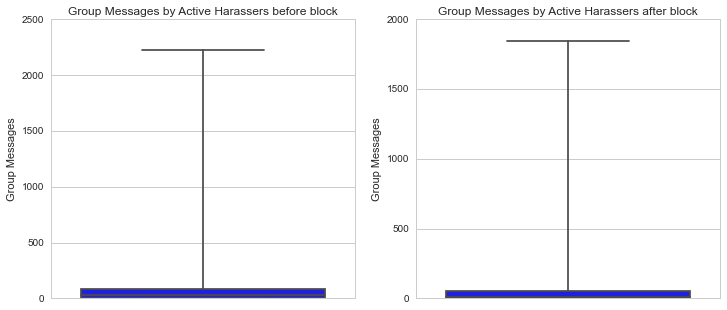

In [23]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

fig = sns.boxplot(gm_before_ah['GM'],whis=np.inf,vert=True,color='blue',ax=axes[0])
fig.set(ylabel='Group Messages',title='Group Messages by Active Harassers before block')

fig1 = sns.boxplot(gm_after_ah['GM'],whis=np.inf,vert=True,color='blue',ax=axes[1])
fig1.set(ylabel='Group Messages',title='Group Messages by Active Harassers after block')

The mean median and standard deviation of number of group messages sent by active harassers before block was 64,27,101 respectively.

The mean median and standard deviation of number of group messages sent by active harassers after block was 42,12,83 respectively.

[<matplotlib.text.Text at 0x1104a1470>, <matplotlib.text.Text at 0x110484ba8>]

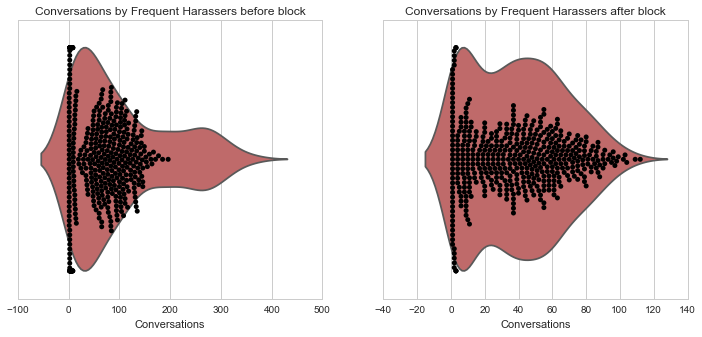

In [32]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

fig = sns.violinplot(before1,inner=None,color='indianred',ax=axes[0])
fig = sns.swarmplot(before,color='black',edgecolor='black',ax=axes[0])
fig.set(xlabel='Conversations',title='Conversations by Frequent Harassers before block')

fig1 = sns.violinplot(after,inner=None,color='indianred',ax=axes[1])
fig1 = sns.swarmplot(after,color='black',edgecolor='white',ax=axes[1])
fig1.set(xlabel='Conversations',title='Conversations by Frequent Harassers after block')

The average conversations before block were 103.33 with standard deviation 96.30 for Frequent Harassers.

The average conversations after block were 5.59 with standard deviation 5.04 for Frequent Harassers.

[<matplotlib.text.Text at 0x104a06be0>, <matplotlib.text.Text at 0x104a23a20>]

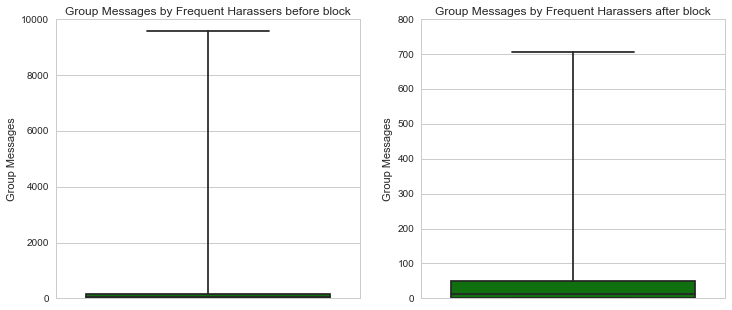

In [3]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

fig = sns.boxplot(gm_before_fh['beforeblockstats1$messages_Support'],whis=np.inf,vert=True,color='green',ax=axes[0])
fig.set(ylabel='Group Messages',title='Group Messages by Frequent Harassers before block')

fig1 = sns.boxplot(gm_after_fh['afterblockstats1$messages_Support'],whis=np.inf,vert=True,color='green',ax=axes[1])
fig1.set(ylabel='Group Messages',title='Group Messages by Frequent Harassers after block')

The mean median and standard deviation of number of group messages sent by frequent harassers before block was 113,58,183 respectively.

The mean median and standard deviation of number of group messages sent by frequent harassers after block was 41,13,73 respectively.

[<matplotlib.text.Text at 0x11400e898>, <matplotlib.text.Text at 0x11401e8d0>]

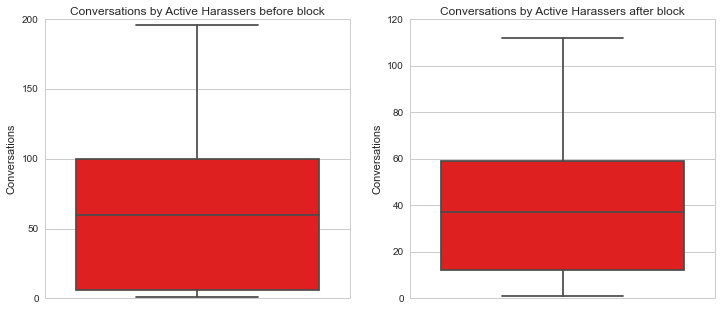

In [43]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

fig = sns.boxplot(before,whis=np.inf,vert=True,color='red',ax=axes[0])
fig.set(ylabel='Conversations',title='Conversations by Active Harassers before block')

fig1 = sns.boxplot(after,whis=np.inf,vert=True,color='red',ax=axes[1])
fig1.set(ylabel='Conversations',title='Conversations by Active Harassers after block')

The median number of conversations before block was 60.00 for Active Harassers.

The median number of conversations after block was 37.00 for Active Harassers.

[<matplotlib.text.Text at 0x1141bab38>, <matplotlib.text.Text at 0x1141d2e10>]

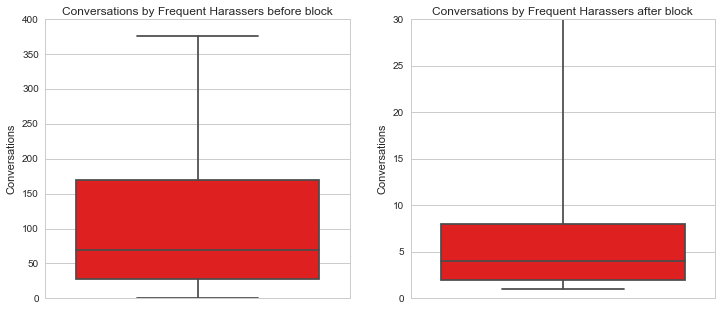

In [44]:
fig, axes = plt.subplots(1,2,figsize=(12, 5))

fig = sns.boxplot(before1,whis=np.inf,vert=True,color='red',ax=axes[0])
fig.set(ylabel='Conversations',title='Conversations by Frequent Harassers before block')

fig1 = sns.boxplot(after1,whis=np.inf,vert=True,color='red',ax=axes[1])
fig1.set(ylabel='Conversations',title='Conversations by Frequent Harassers after block')

The median number of conversations before block was 69.00 for Frequent Harassers.

The median number of conversations after block was 4.00 for Frequent Harassers.

In [21]:
active_har_pairs = active_harassers.loc[:,['growthPoints','numConversations','currentLevel','groupSupportMsgs','compassionHearts']]
freq_har_pairs = frequent_harassers.loc[:,['growthPoints','numConversations','currentLevel','groupSupportMsgs','compassionHearts']]
active_norm_pairs = active_normal_members.loc[:,['growthPoints','numConversations','currentLevel','groupSupportMsgs']]

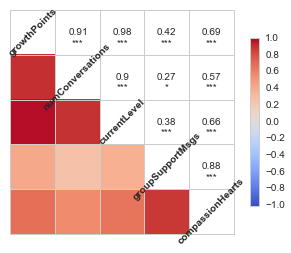

In [22]:
sns.corrplot(freq_har_pairs.dropna(),annot=True)

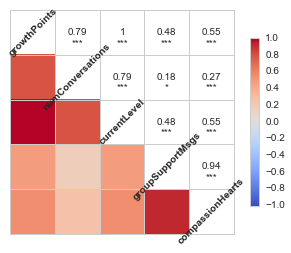

In [24]:
sns.corrplot(active_har_pairs.dropna(),annot=True)

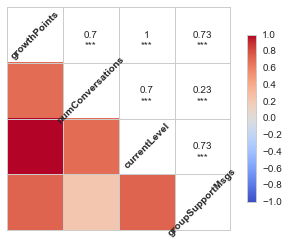

In [23]:
sns.corrplot(active_norm_pairs.dropna(),annot=True)